# EDA

Exploratory data analysis on the data. 

Import libraries.

In [3]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import scipy.stats as st

In [4]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'

Use address and file name as follow.

In [5]:
path = '../datasets/'
file_name = 'train_sample.csv'

In [7]:
train_df = pd.read_csv(path+file_name, 
                       usecols=['ip','app','device',
                                'os', 'channel', 'click_time', 
                                'is_attributed'])

Check out the data head.

In [8]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


Convert the click time to day and hour and add it to data.

In [9]:
train_df['hour'] = pd.to_datetime(train_df.click_time).dt.hour.astype('uint8')
train_df['day'] = pd.to_datetime(train_df.click_time).dt.day.astype('uint8')

In [10]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9


Doing feathering, grouping-merging as follow.

In [11]:
gp = train_df[['ip','day','hour','channel']]\
    .groupby(by=['ip','day','hour'])[['channel']]\
    .count().reset_index()\
    .rename(index=str, columns={'channel': '*ip_day_hour_count_channel'})
train_df = train_df.merge(gp, on=['ip','day','hour'], how='left')


gp = train_df[['ip', 'app', 'channel']].groupby(by=['ip', 'app'])[['channel']].\
            count().reset_index().\
            rename(index=str, columns={'channel': '*ip_app_count_channel'})
train_df = train_df.merge(gp, on=['ip','app'], how='left')


gp = train_df[['ip','app', 'os', 'channel']].\
            groupby(by=['ip', 'app', 'os'])[['channel']].\
            count().reset_index().\
            rename(index=str, columns={'channel': '*ip_app_os_count_channel'})
train_df = train_df.merge(gp, on=['ip','app', 'os'], how='left')


gp = train_df[['ip','day','hour','channel']].\
            groupby(by=['ip','day','channel'])[['hour']].\
            var().reset_index().\
            rename(index=str, columns={'hour': '*ip_tchan_count'})
train_df = train_df.merge(gp, on=['ip','day','channel'], how='left')


gp = train_df[['ip','app', 'os', 'hour']].\
            groupby(by=['ip', 'app', 'os'])[['hour']].\
            var().reset_index().\
            rename(index=str, columns={'hour': '*ip_app_os_var'})
train_df = train_df.merge(gp, on=['ip','app', 'os'], how='left')


gp = train_df[['ip','app', 'channel', 'day']].\
            groupby(by=['ip', 'app', 'channel'])[['day']].\
            var().reset_index().\
            rename(index=str, columns={'day': '*ip_app_channel_var_day'})
train_df = train_df.merge(gp, on=['ip','app', 'channel'], how='left')

gp = train_df[['ip','app', 'channel','hour']].\
            groupby(by=['ip', 'app', 'channel'])[['hour']].\
            mean().reset_index().\
            rename(index=str, columns={'hour': '*ip_app_channel_mean_hour'})

train_df = train_df.merge(gp, on=['ip','app', 'channel'], how='left')

In [12]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,*ip_day_hour_count_channel,*ip_app_count_channel,*ip_app_os_count_channel,*ip_tchan_count,*ip_app_os_var,*ip_app_channel_var_day,*ip_app_channel_mean_hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2,NaN,24.5,NaN,9.0
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1,19.0,NaN,0.25,11.5
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1,NaN,NaN,NaN,18.0
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1,NaN,NaN,NaN,4.0
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1,NaN,NaN,NaN,9.0


Check out the data info.

In [15]:
train_df.describe()

,ip,app,device,os,channel,is_attributed,hour,day,*ip_day_hour_count_channel,*ip_app_count_channel,*ip_app_os_count_channel,*ip_tchan_count,*ip_app_os_var,*ip_app_channel_var_day,*ip_app_channel_mean_hour
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,10877.000000,10285.000000,15166.000000,100000.00000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270,9.328590,7.861460,1.493280,3.580260,1.294880,28.060797,35.318645,0.670508,9.32859
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591,6.180586,0.889266,2.020593,10.553764,1.644388,33.822226,40.570289,0.710953,5.90380
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000,4.000000,7.000000,1.000000,1.000000,1.000000,4.500000,6.333333,0.250000,4.50000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000,9.000000,8.000000,1.000000,1.000000,1.000000,18.000000,24.500000,0.500000,9.00000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000,14.000000,9.000000,1.000000,2.000000,1.000000,39.555556,50.000000,0.888889,13.00000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000,23.000000,9.000000,28.000000,132.000000,33.000000,264.500000,264.500000,4.500000,23.00000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ip                          100000 non-null  int64  
 1   app                         100000 non-null  int64  
 2   device                      100000 non-null  int64  
 3   os                          100000 non-null  int64  
 4   channel                     100000 non-null  int64  
 5   click_time                  100000 non-null  object 
 6   is_attributed               100000 non-null  int64  
 7   hour                        100000 non-null  uint8  
 8   day                         100000 non-null  uint8  
 9   *ip_day_hour_count_channel  100000 non-null  int64  
 10  *ip_app_count_channel       100000 non-null  int64  
 11  *ip_app_os_count_channel    100000 non-null  int64  
 12  *ip_tchan_count             10877 non-null   float64
 13  *ip_app_os_var 

### Some visualization on data.

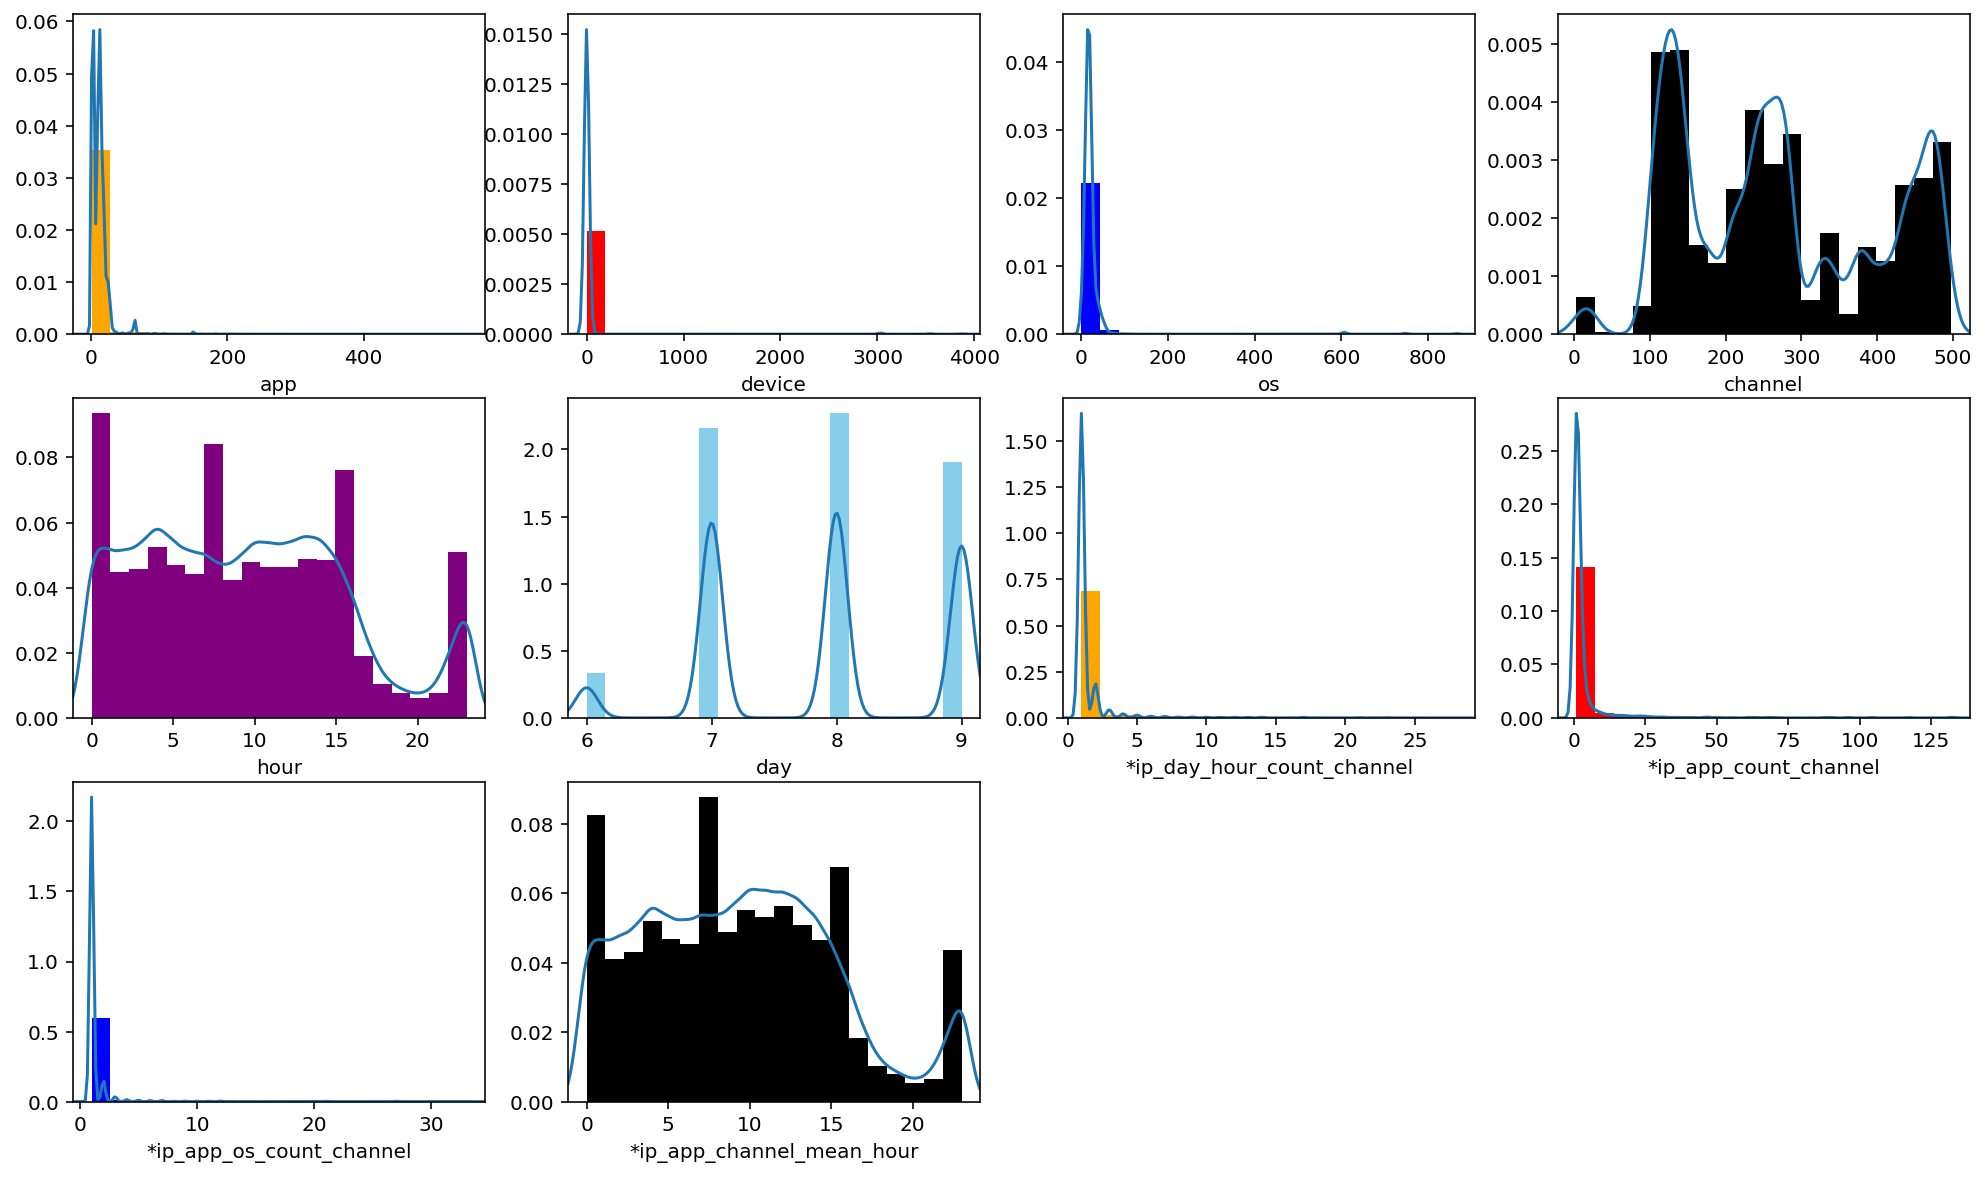

In [36]:
cols = ['app','device','os', 
        'channel', 'hour', 'day',
       '*ip_day_hour_count_channel', '*ip_app_count_channel', 
        '*ip_app_os_count_channel', '*ip_app_channel_mean_hour']

colors = ['orange', 'red', 'blue', 
          'black', 'purple', 'skyblue',
         'orange', 'red', 'blue', 'black']

plt.figure(figsize=(17,10))


for counter, colnm in enumerate(cols,1):

    plt.subplot(3, 4, counter)
    plt.hist(train_df[colnm], density=True, bins = 20, 
             log=False, color = colors[counter-1])
    
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 200)
    kde = st.gaussian_kde(train_df[colnm])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    
    plt.xlabel(colnm)